![imdb](imdb.jpg)

The IMDB dataset is a collection of information extracted from the Internet Movie Database (IMDB). These datasets encompass various aspects of movies, TV shows, and other entertainment media listed on IMDB.

### Column Descriptors

- **Poster**: Link to the poster used by IMDB
- **Title**: Name of the movie
- **Year**: Year the movie was released
- **Certificate**: Certificate earned by the movie
- **Duration (min)**: Total duration of the movie
- **Genre**: Genre of the movie
- **Rating**: Rating of the movie on IMDB
- **Overview**: Mini story/summary
- **Metascore**: Score earned by the movie
- **Director**: Name of the director

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("imdb-movies-dataset.csv")
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


### Cleaning the data

In [4]:
df = df.drop(['Poster','Certificate','Cast','Description','Review Title','Review','Review Count'], axis=1)

In [5]:
df.dtypes

Title              object
Year              float64
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Votes              object
dtype: object

In [6]:
df.isnull().sum()

Title                0
Year               150
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Votes              404
dtype: int64

#### Change `Year` type to int

In [8]:
df['Year'] = df['Year'].fillna(0).astype(int)

In [9]:
df.dtypes

Title              object
Year                int64
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Votes              object
dtype: object

#### Remove null values from `Duration (min)`, `Rating`, `Metascore`, `Votes`

In [10]:
df['Duration (min)'] = df['Duration (min)'].replace(np.nan, df['Duration (min)'].mean())
df['Rating'] = df['Rating'].replace(np.nan, 0)
#df['Metascore'] = df['Metascore'].replace(np.nan, 0)
df['Votes'] = df['Votes'].replace(np.nan, 0)

#### Null Values

In [11]:
df.isnull().sum()

Title                0
Year                 0
Duration (min)       0
Genre                7
Rating               0
Metascore         2445
Director             5
Votes                0
dtype: int64

#### Change `Votes` type to int

In [12]:
df['Votes'] = df['Votes'].apply(lambda x: str(x).replace(',',''))
df['Votes'] = df['Votes'].astype(int)

#### Statistcs

In [7]:
df.describe()

,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


### Distributions and Correlatons

In [20]:
df.head()

,Title,Year,Duration (min),Genre,Rating,Metascore,Director,Votes
0,The Idea of You,2023,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,28744
1,Kingdom of the Planet of the Apes,2023,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,22248
2,Unfrosted,2023,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,18401
3,The Fall Guy,2023,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,38953
4,Challengers,2023,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,32517


<Axes: >

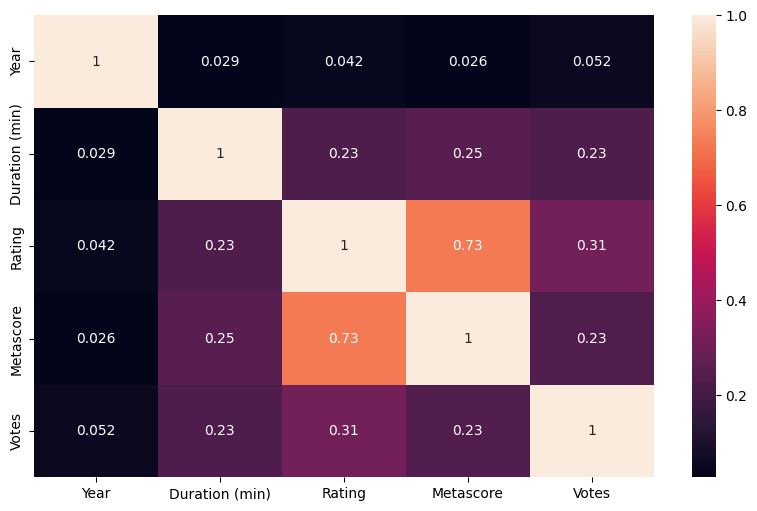

In [14]:
corr = df[['Year','Duration (min)','Rating','Metascore','Votes']]

plt.figure(figsize=(10,6))
sns.heatmap(corr.corr(), annot=True)

#### Observations:

- There is a big correlation between Rating and Metascore
- There is some relations between the duration of the movie and the rating
- Rating have more correlations in vote probably becase most of the votes are from users

### What is the most common genre for movies ?

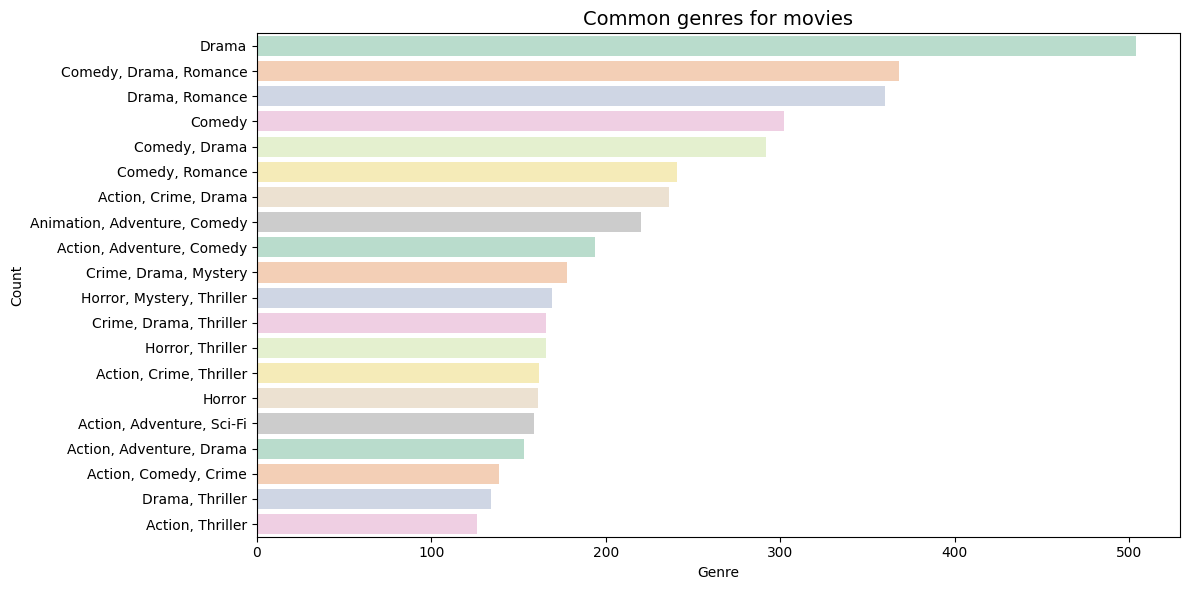

In [15]:
vals = df['Genre'].value_counts().head(20)

vals = pd.DataFrame(vals).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=vals['count'], y=vals['Genre'], palette='Pastel2')
plt.title('Common genres for movies', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Observation:
Most movies genres are 'Drama','Romance' and 'Comedy'. Probably the public who like this type of content are couples and teens. 

## Movies, Score and Rating

Let's observe that `Rating` and `Metascore` are different. The `Rating` is the score founded in IMDB and `Metascore` is from Metacritic.

### Movies rated in IMDB

In [16]:
dir_movie_vote = df.groupby('Title')[['Rating','Metascore']].mean().reset_index()
dir_movie_vote = dir_movie_vote.sort_values(by='Rating', ascending=False).head(30)

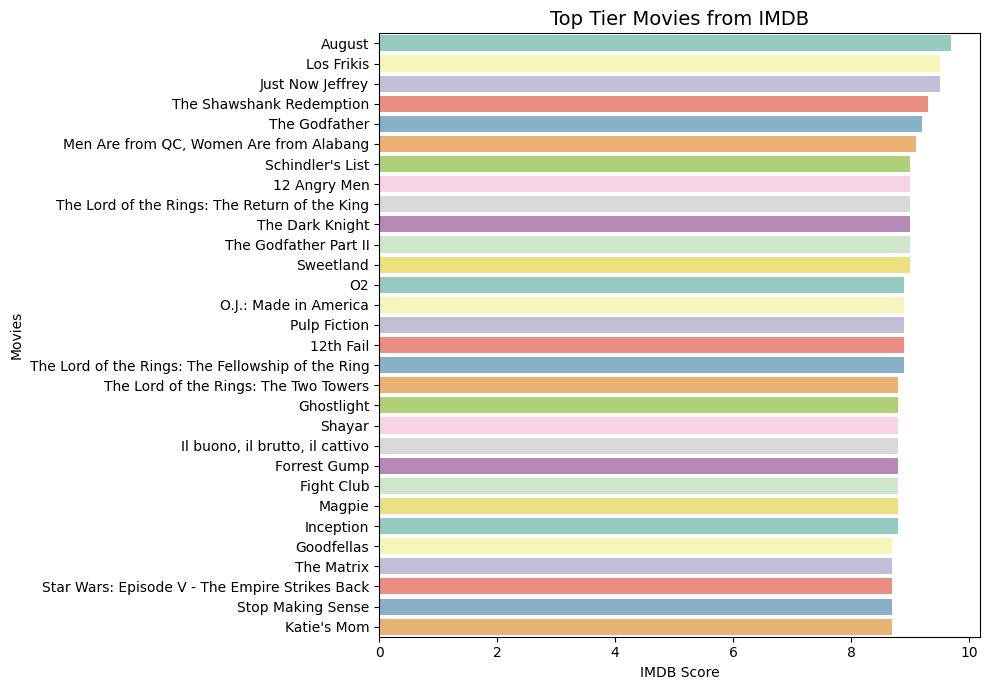

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(data=dir_movie_vote, y='Title', x='Rating', palette='Set3')
plt.title("Top Tier Movies from IMDB", fontsize=14)
plt.xlabel('IMDB Score')
plt.ylabel('Movies')
plt.tight_layout()
plt.show()

### Movies rated in Metacritic

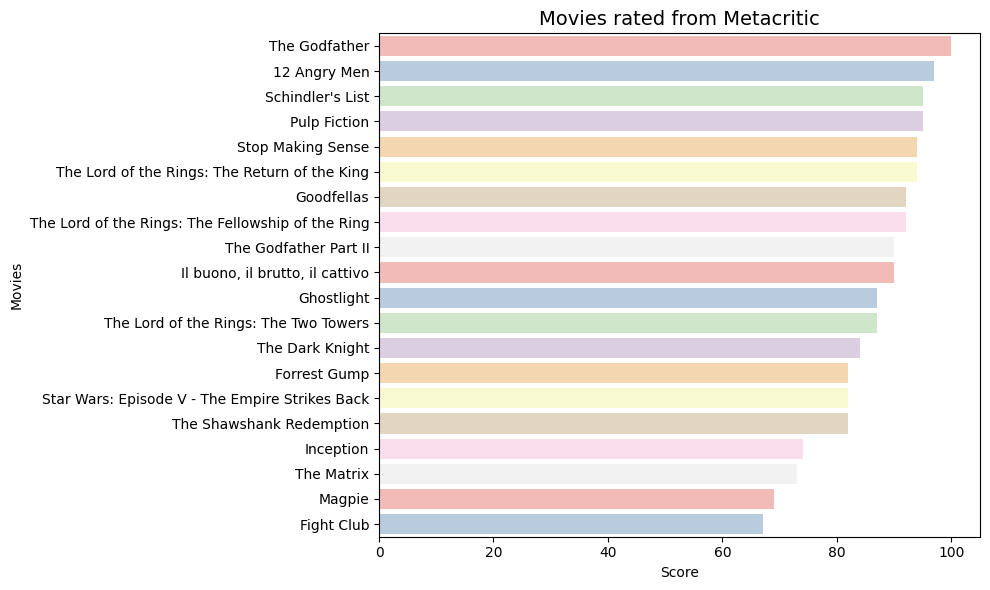

In [18]:
dir_movie_vote2 = dir_movie_vote.sort_values(by='Metascore', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(data=dir_movie_vote2, y='Title', x='Metascore', palette='Pastel1')
plt.title("Movies rated from Metacritic", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Movies')
plt.tight_layout()
plt.show()

## Best directors based on film ratings

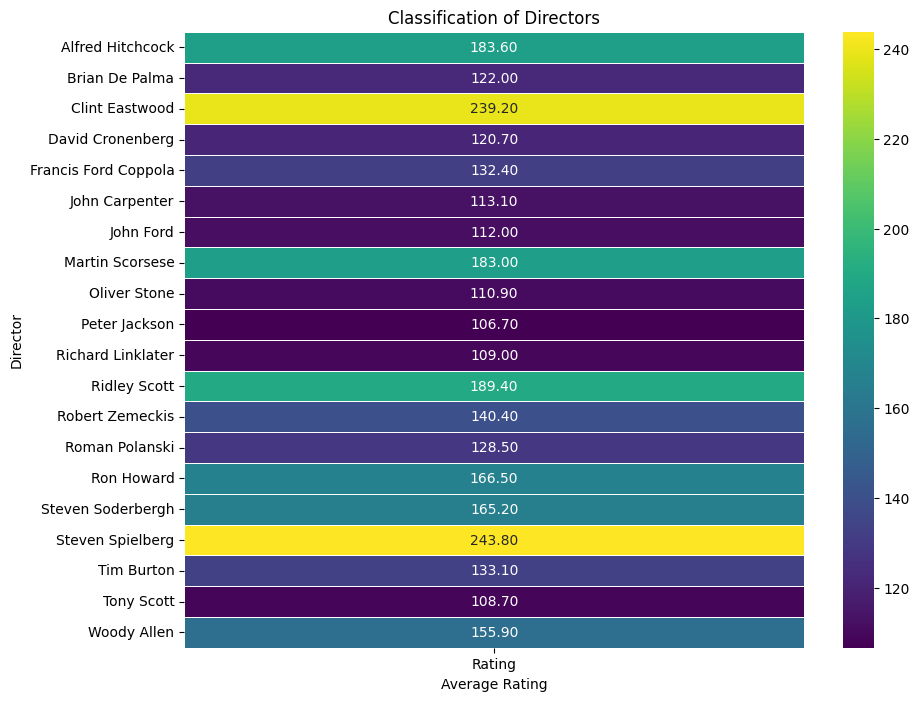

In [22]:
best_directors = df.groupby('Director')['Rating'].sum().reset_index()
top_directors = best_directors.sort_values(by='Rating', ascending=False).reset_index(drop=True).head(20)

heatmap_data = top_directors.pivot_table(index='Director', values='Rating')

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Classification of Directors')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

#### Observations:
This graph shows us the best directors in the world, this classification is based on the sum of all the works carried out<br>If you like movies we can see some common names here as: Steven Spielberg, Martin Scorsese, Clint Eastwood and Tim Buron.



### Conclusion:
The conclusion of these explorations was to identify patterns, make observations, understand how site classifications work, and <br>obtain actionable recommendations. One of the most intriguing aspects is the correlations between various factors, including the<br> perceptions of critics and users, and how the duration of a film can influence its success. Additionally, knowing the most beloved <br>genres and films can guide us in creating content that aligns with public preferences, fostering attention and innovation.